# **EDA**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2'

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pingouin as pg


In [6]:
df = pd.read_csv('Data/PROCESSED/movies_ready_for_EDA.csv')

# Visualisations - Hypothesis 1: 
**"Movies that get higher averages votes are likely to be an indicator of success (high revenue)."**

In [7]:
df.head()

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Has_tagline,ROI,Log_budget,Log_revenue,Decade,Runtime_bucket,Language_full,Primary_genre,Primary_production_country,Primary_production_company
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,1,11.763566,19.283571,21.748578,2000.0,epic,English,Action,United States of America,Ingenious Film Partners
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1,3.203333,19.519293,20.683485,2000.0,epic,English,Adventure,United States of America,Walt Disney Pictures
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,1,3.594590,19.316769,20.596199,2010.0,very_long,English,Action,United Kingdom,Columbia Pictures
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1,4.339756,19.336971,20.804790,2010.0,epic,English,Action,United States of America,Legendary Pictures
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,1,1.092843,19.376192,19.464974,2010.0,very_long,English,Action,United States of America,Walt Disney Pictures


We now are going to focus on finding trends within the dataset and seeing whether certain hypotheses are proven or disproven.

**IMPORTANT NOTE**: Success in this context is if a movie generates high box-office revenue.

Before we start looking at visualisation using revenue, it is important to filter out those values that  that are 0:

In [8]:
df['Missing_Status'] = np.select(
    [
        (df['Budget'] == 0) & (df['Revenue'] == 0),
        (df['Budget'] == 0),
        (df['Revenue'] == 0)
    ],
    [
        'Both missing',
        'Budget missing',
        'Revenue missing'
    ],
    default='Complete'
)

# Convert to categorical type (optional, for memory efficiency)
df['Missing_Status'] = df['Missing_Status'].astype('category')

# Quick check
df['Missing_Status'].value_counts()

Missing_Status
Complete           3229
Both missing        890
Revenue missing     537
Budget missing      147
Name: count, dtype: int64

In [9]:
df_revenue = df[~df['Missing_Status'].isin(['Revenue missing', 'Both missing'])]


We will now create some visualisations to further understand the data. The first one will be **Vote Average** Vs **Revenue:**

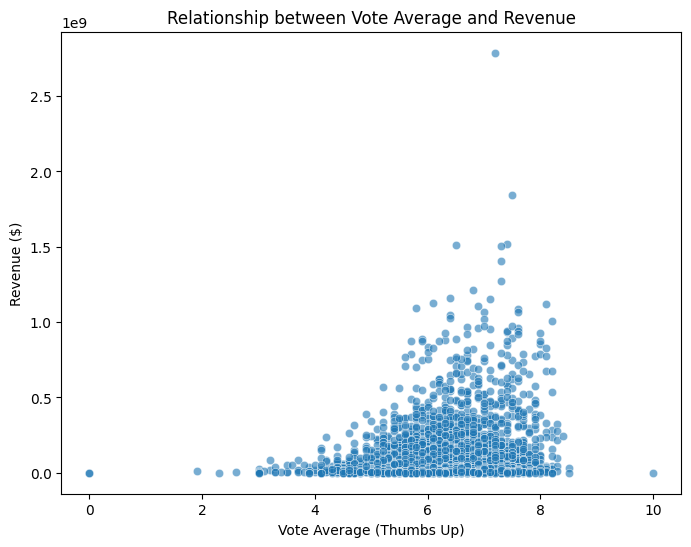

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_revenue, x='Vote_average', y='Revenue', alpha=0.6,)
plt.title('Relationship between Vote Average and Revenue')
plt.xlabel('Vote Average (Thumbs Up)')
plt.ylabel('Revenue ($)')
plt.show()

- In the scatter plot we can see that movies with a vote average above 6 seem to have a higher revenue however there seems to be a second variable that causes higher revenue cpmbined with average votes.
- Overall however, the scatterplot does have a slight positive trend indicating that higher averages do have some impact on revenue.
- The bulk of the data is found between the ranges 5-8 meaning there will be more variance in results and would need further visualisations to understand.

We will split the voting averages into 2 groups to better understand the differences.

C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\1612396675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['Rating_Group'] = pd.cut(df['Vote_average'], bins=[0,7,10], labels=['Low', 'High'])


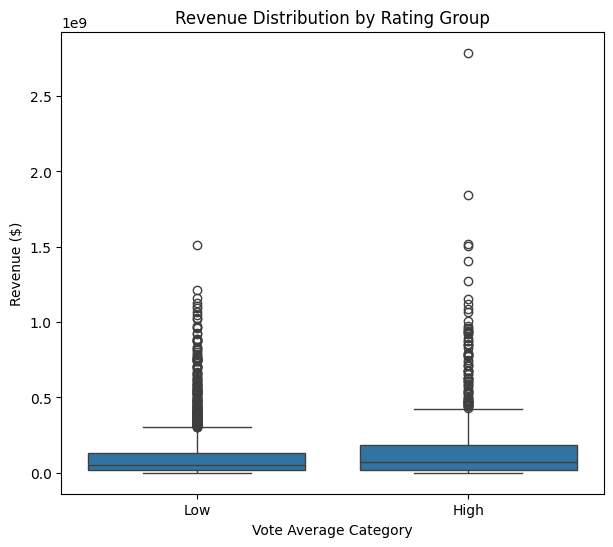

In [12]:
df_revenue['Rating_Group'] = pd.cut(df['Vote_average'], bins=[0,7,10], labels=['Low', 'High'])

plt.figure(figsize=(7,6))
sns.boxplot(x='Rating_Group', y='Revenue', data=df_revenue)
plt.title('Revenue Distribution by Rating Group')
plt.xlabel('Vote Average Category')
plt.ylabel('Revenue ($)')
plt.show()

- Both "Low" and "High" rating groups have very similar median revenues. This would suggest vote average doesn't have a huge impact on revenue.
- High-rated movies show more and higher revenue outliers. Low-rated movies also have outliers but they are generally less extreme
- Both datasets are heavily right-skewed.
- Overall the boxplot suggests that while high vote averages don't gurantee high revenue for most movies, they do increase the likelhood of higher revenue.

Let's now check how vote averages correlate vs other success metrics:

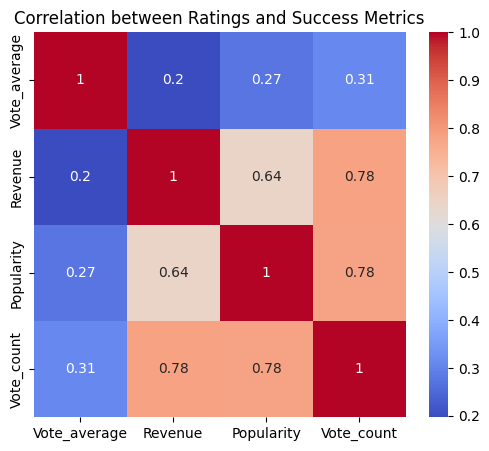

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Vote_average', 'Revenue', 'Popularity', 'Vote_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Ratings and Success Metrics')
plt.show()

- Vote average compared to the other success metrics has weak possitive correlations. This cofirms there is a positive correlation but its not huge. A t-test is required to correctly determine if there is a significance.
- Popularity seems to be the more impactful cause of higher revenue which makes sense due to more people wanting to watch the movie and hence higher revenue.

Finally lets further split the vote averages to see the revenues of each category:

C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\1862000223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['Vote_bin'] = pd.cut(df['Vote_average'], bins=[0,4,6,8,10], labels=['Poor','Average','Good','Excellent'])


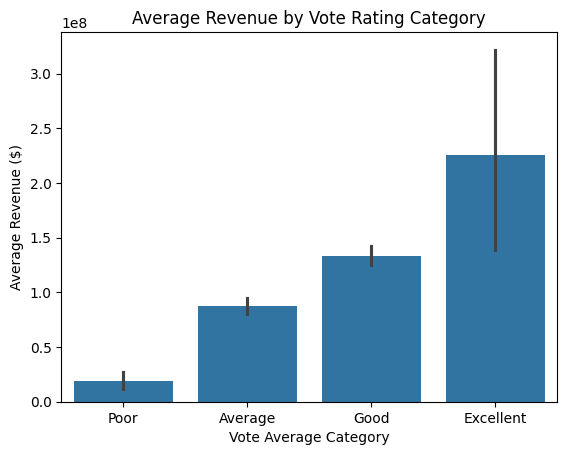

In [ ]:
df_revenue['Vote_bin'] = pd.cut(df['Vote_average'], bins=[0,4,6,8,10], labels=['Poor','Average','Good','Excellent'])

sns.barplot(data=df_revenue, x='Vote_bin', y='Revenue', estimator='mean')
plt.title('Average Revenue by Vote Rating Category')
plt.xlabel('Vote Average Category')
plt.ylabel('Average Revenue ($)')
plt.show()

- In this barplot we can clearly see that there is an upward trend so it does further solidify that higher average votes to make an impact on revenue even if not greatly.
- One thing that can be noted here compared to other graphs is the ratings above 8 being much higher than the previous categories indicating that the best rated movies usually have the best revenue.
- An important thing to note with this graph is that it uses the average therefore it can be skewed by outliers and the excellent category has a significantly lower amount of sample size

## Statistical Testing - Hypothesis 1

Now we will perform a t-test to determine if the difference in revenue between low-rated and high-rated movies is statistically significant. We'll use an independent samples t-test since we're comparing two separate groups.

In [22]:
# Filter out invalid or missing values
filtered_df = df[(df['Vote_average'] > 0) & (df['Revenue'] > 0)].copy()

# Create a categorical variable for rating group
filtered_df['Rating_Group'] = pd.cut(
    filtered_df['Vote_average'],
    bins=[0, 7, 10],
    labels=['Low', 'High']
)

# Check sample sizes
print("Sample sizes:")
print(filtered_df['Rating_Group'].value_counts())
print(f"\nTotal movies with valid data: {len(filtered_df)}")

Sample sizes:
Rating_Group
Low     2705
High     669
Name: count, dtype: int64

Total movies with valid data: 3374


In [23]:
# Perform independent samples t-test
ttest_results = pg.ttest(
    x=filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'],
    y=filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue'],
    correction=False
)

print("T-Test Results:")
print(ttest_results)
print("\n--- Interpretation ---")
print(f"T-statistic: {ttest_results['T'].values[0]:.4f}")
print(f"P-value: {ttest_results['p-val'].values[0]:.6f}")
print(f"Degrees of freedom: {ttest_results['dof'].values[0]:.0f}")
print(f"Cohen's d (effect size): {ttest_results['cohen-d'].values[0]:.4f}")

# Interpret the results
alpha = 0.05
p_value = ttest_results['p-val'].values[0]
if p_value < alpha:
    print(f"\nSIGNIFICANT: p-value ({p_value:.6f}) < {alpha}")
    print("We reject the null hypothesis. There IS a statistically significant difference")
    print("in revenue between low-rated and high-rated movies.")
else:
    print(f"\nNOT SIGNIFICANT: p-value ({p_value:.6f}) >= {alpha}")
    print("We fail to reject the null hypothesis. There is NO statistically significant")
    print("difference in revenue between low-rated and high-rated movies.")

T-Test Results:
               T   dof alternative         p-val                       CI95%  \
T-test  8.130109  3372   two-sided  5.962262e-16  [48422040.66, 79199391.25]   

         cohen-d       BF10  power  
T-test  0.351053  6.461e+12    1.0  

--- Interpretation ---
T-statistic: 8.1301
P-value: 0.000000
Degrees of freedom: 3372
Cohen's d (effect size): 0.3511

SIGNIFICANT: p-value (0.000000) < 0.05
We reject the null hypothesis. There IS a statistically significant difference
in revenue between low-rated and high-rated movies.


After completing the t-test we can see that there is deinitely a significant difference in revenue for movies with higher average votes.

### Additional Statistical Tests

Since revenue data is heavily skewed (as we saw in the boxplot), we should also perform a **Mann-Whitney U test** (non-parametric alternative to t-test) which doesn't assume normal distribution.

In [24]:
# Mann-Whitney U test (non-parametric alternative)
mw_results = pg.mwu(
    x=filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'],
    y=filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue'],
    alternative='two-sided'
)

print("Mann-Whitney U Test Results:")
print(mw_results)
print("\n--- Interpretation ---")
print(f"U-statistic: {mw_results['U-val'].values[0]:.0f}")
print(f"P-value: {mw_results['p-val'].values[0]:.6f}")
print(f"Effect size (RBC): {mw_results['RBC'].values[0]:.4f}")

p_value_mw = mw_results['p-val'].values[0]
if p_value_mw < alpha:
    print(f"\n SIGNIFICANT: p-value ({p_value_mw:.6f}) < {alpha}")
    print("The Mann-Whitney U test confirms a significant difference in revenue distributions.")
else:
    print(f"\n NOT SIGNIFICANT: p-value ({p_value_mw:.6f}) >= {alpha}")
    print("The Mann-Whitney U test shows no significant difference in revenue distributions.")

Mann-Whitney U Test Results:
         U-val alternative     p-val       RBC      CLES
MWU  1009110.5   two-sided  0.000004  0.115258  0.557629

--- Interpretation ---
U-statistic: 1009110
P-value: 0.000004
Effect size (RBC): 0.1153

 SIGNIFICANT: p-value (0.000004) < 0.05
The Mann-Whitney U test confirms a significant difference in revenue distributions.


### Check Assumptions for T-Test

For the t-test to be valid, we will check if the data meets the assumptions. We will check for normality and variance equality:

In [25]:
high_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue']
low_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue']

sample_size = min(5000, len(high_revenue), len(low_revenue))

print("Normality Test (Shapiro-Wilk):")
print("-" * 50)
if len(high_revenue) > sample_size:
    high_sample = high_revenue.sample(sample_size, random_state=42)
    normality_high = pg.normality(high_sample)
    print(f"High-rated movies (sample of {sample_size}):")
else:
    normality_high = pg.normality(high_revenue)
    print(f"High-rated movies (n={len(high_revenue)}):")
print(normality_high)

if len(low_revenue) > sample_size:
    low_sample = low_revenue.sample(sample_size, random_state=42)
    normality_low = pg.normality(low_sample)
    print(f"\nLow-rated movies (sample of {sample_size}):")
else:
    normality_low = pg.normality(low_revenue)
    print(f"\nLow-rated movies (n={len(low_revenue)}):")
print(normality_low)

Normality Test (Shapiro-Wilk):
--------------------------------------------------
High-rated movies (n=669):
                W          pval  normal
Revenue  0.621641  7.790377e-36   False

Low-rated movies (sample of 669):
                W          pval  normal
Revenue  0.687721  2.431635e-33   False


As the p-value < 0.05, the data is NOT normally distributed. Therefore, given the skewed nature of revenue data, Mann-Whitney U test is more appropriate.

In [26]:
# Levene's test for equality of variances
levene_results = pg.homoscedasticity(
    data=filtered_df,
    dv='Revenue',
    group='Rating_Group',
    method='levene'
)

print("Homogeneity of Variance Test (Levene's):")
print(levene_results)
print("\n If p-value < 0.05, variances are NOT equal.")

Homogeneity of Variance Test (Levene's):
                W          pval  equal_var
levene  66.824971  4.154190e-16      False

 If p-value < 0.05, variances are NOT equal.


In this case we can see that the variances are not equal between the tests so a different test that doesn't care about equal variances.

### Summary of Statistical Tests

We are going to summarize the descriptive statistics for both groups:

In [27]:
# Descriptive statistics by group
print("Descriptive Statistics by Rating Group:")
print("=" * 70)
summary_stats = filtered_df.groupby('Rating_Group')['Revenue'].describe()
print(summary_stats)

print("\n" + "=" * 70)
print("Mean Revenue Comparison:")
print(f"Low-rated movies (0-7):  ${low_revenue.mean():,.2f}")
print(f"High-rated movies (7-10): ${high_revenue.mean():,.2f}")
print(f"Difference: ${high_revenue.mean() - low_revenue.mean():,.2f}")
print(f"Percentage increase: {((high_revenue.mean() - low_revenue.mean()) / low_revenue.mean() * 100):.2f}%")

print("\n" + "=" * 70)
print("Median Revenue Comparison:")
print(f"Low-rated movies (0-7):  ${low_revenue.median():,.2f}")
print(f"High-rated movies (7-10): ${high_revenue.median():,.2f}")
print(f"Difference: ${high_revenue.median() - low_revenue.median():,.2f}")

Descriptive Statistics by Rating Group:
               count          mean           std  min         25%         50%  \
Rating_Group                                                                    
Low           2705.0  1.044483e+08  1.532462e+08  5.0  14899417.0  49469904.0   
High           669.0  1.682590e+08  2.678082e+08  7.0  19000000.0  69959751.0   

                      75%           max  
Rating_Group                             
Low           130431368.0  1.513529e+09  
High          181813770.0  2.787965e+09  

Mean Revenue Comparison:
Low-rated movies (0-7):  $104,448,270.49
High-rated movies (7-10): $168,258,986.44
Difference: $63,810,715.95
Percentage increase: 61.09%

Median Revenue Comparison:
Low-rated movies (0-7):  $49,469,904.00
High-rated movies (7-10): $69,959,751.00
Difference: $20,489,847.00


C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\3059623682.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = filtered_df.groupby('Rating_Group')['Revenue'].describe()


## Results Summary - Hypothesis 1 (High vs Low Ratings)

The summary below summarises t-test and Mann-Whitney U test results comparing Revenue between High (7–10) vs Low (0–7) rating groups, including effect sizes, an optional directional check, and a log-transformed sensitivity analysis.

In [53]:
alpha = 0.05

high_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'].dropna()
low_revenue  = filtered_df.loc[filtered_df['Rating_Group'] == 'Low',  'Revenue'].dropna()

summary_lines_h1 = []

# t-test 
ttest_results = pg.ttest(x=high_revenue, y=low_revenue, correction=False)
p_t = ttest_results['p-val'].values[0]
cohen_d = ttest_results['cohen-d'].values[0]
sig_t = 'SIGNIFICANT' if p_t < alpha else 'Not significant'
summary_lines_h1.append(f"t-test (two-sided): p={p_t:.6f}, Cohen's d={cohen_d:.4f} → {sig_t}")

# Mann-Whitney U two-sided
mw_h1 = pg.mwu(x=high_revenue, y=low_revenue, alternative='two-sided')
p_mw = mw_h1['p-val'].values[0]
rbc_mw = mw_h1['RBC'].values[0]
dir_mw = 'High > Low' if rbc_mw > 0 else ('High < Low' if rbc_mw < 0 else 'No direction')
sig_mw = 'SIGNIFICANT' if p_mw < alpha else 'Not significant'
summary_lines_h1.append(f"Mann-Whitney (two-sided): p={p_mw:.6f}, RBC={rbc_mw:.4f} → {sig_mw} ({dir_mw})")

# Directional check (one-sided): High > Low
mw_h1_greater = pg.mwu(x=high_revenue, y=low_revenue, alternative='greater')
summary_lines_h1.append(f"Mann-Whitney (one-sided High>Low): p={mw_h1_greater['p-val'].values[0]:.6f}")

# Sensitivity: log1p transform
log_high = np.log1p(high_revenue)
log_low  = np.log1p(low_revenue)
mw_h1_log = pg.mwu(x=log_high, y=log_low, alternative='two-sided')
summary_lines_h1.append(f"log1p(Revenue) MWU (two-sided): p={mw_h1_log['p-val'].values[0]:.6f}, RBC={mw_h1_log['RBC'].values[0]:.4f}")

print("\n=== Results Summary (Hypothesis 1: High vs Low Ratings) ===\n")
for line in summary_lines_h1:
    print(line)

print("\n--- Insights ---")
if p_mw < alpha and rbc_mw > 0:
    print("Higher-rated movies typically achieve higher revenues than lower-rated movies (statistically significant).")
elif p_mw < alpha and rbc_mw < 0:
    print("Lower-rated movies typically achieve higher revenues than higher-rated movies (statistically significant).")
else:
    print("No statistically significant difference in revenue distributions between higher- and lower-rated movies.")

if p_t < alpha:
    print("Parametric t-test also indicates a significant difference.")

if mw_h1_greater['p-val'].values[0] < alpha:
    print("Directional check supports: High-rated > Low-rated revenues (one-sided test).")



=== Results Summary (Hypothesis 1: High vs Low Ratings) ===

t-test (two-sided): p=0.000000, Cohen's d=0.3511 → SIGNIFICANT
Mann-Whitney (two-sided): p=0.000004, RBC=0.1153 → SIGNIFICANT (High > Low)
Mann-Whitney (one-sided High>Low): p=0.000002
log1p(Revenue) MWU (two-sided): p=0.000004, RBC=0.1153

--- Insights ---
Higher-rated movies typically achieve higher revenues than lower-rated movies (statistically significant).
Parametric t-test also indicates a significant difference.
Directional check supports: High-rated > Low-rated revenues (one-sided test).


# Visualisations - Hypothesis 4

**"Action movies have a higher likelihood of box office success"**

The first thing we will do, is make a new column that filters movies with "action" within the genre column. The genre column are in JSON-like strings so we will parse it and check if "Action" appears inside and then make a separate column for flagging them:

In [28]:
import ast

# Extract list of genre names from stringified JSON
def extract_genres(x):
    try:
        genres = ast.literal_eval(x)
        if isinstance(genres, list):
            return [g['name'] for g in genres if 'name' in g]
        else:
            return []
    except (ValueError, SyntaxError, TypeError):
        return []

df['Genre_list'] = df['Genres'].apply(extract_genres)

# Create a flag for Action movies

df['Is_Action'] = df['Genre_list'].apply(lambda genres: 'Action' in genres)


df['Is_Action'] = df['Is_Action'].astype('category')


df['Is_Action'].value_counts()


Is_Action
False    3649
True     1154
Name: count, dtype: int64

Add the column to df_revenue

In [29]:
df_revenue = df_revenue.merge(
    df[['Id', 'Is_Action', 'Genre_list']],  # keep only needed columns
    on='Id',
    how='left'
)

Let's now start off with some visualisations to understand this hypothesis:

We will create a revenue distribution using a boxplot showing the difference between Action movies vs Non-Action movies: 

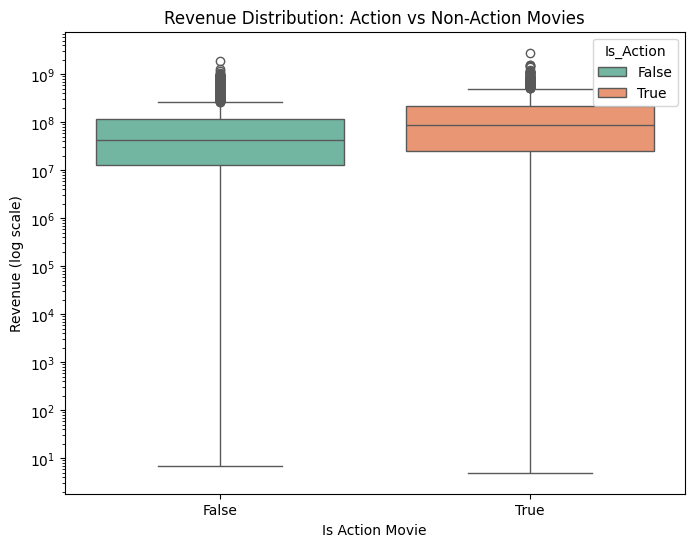

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_revenue, x='Is_Action', y='Revenue', palette='Set2', hue='Is_Action')
plt.yscale('log')  # Revenue often very skewed
plt.title('Revenue Distribution: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Revenue (log scale)')
plt.show()

- A movie with action within its name does have a slightly higher median implying that the typical action film does earn more. 
- Despite the higher upside to the boxplot of action movies, the distributions overlap a lot meaning a certain genre alone isn't the only factor that contributes to overall revenue but it there is definitely a difference
- Overall, action movies tend to have a hugh upside and a higher typical revenue.

Let's now see the average profit of Action vs Non-Action Movies:

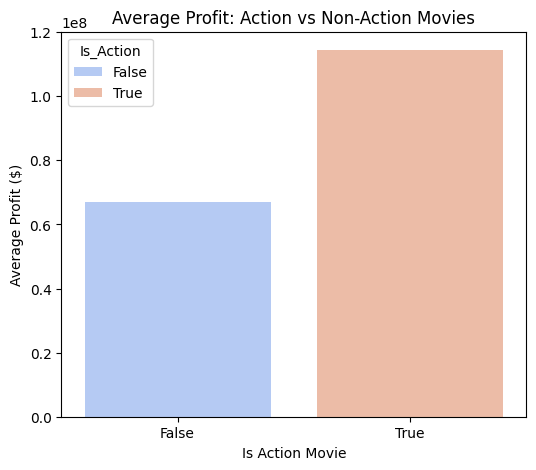

In [34]:
df_grouped = df_revenue.groupby('Is_Action', as_index=False, observed=False)['Profit'].mean()

plt.figure(figsize=(6,5))
sns.barplot(data=df_grouped, x='Is_Action', y='Profit', palette='coolwarm', hue='Is_Action')
plt.title('Average Profit: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Average Profit ($)')
plt.show()

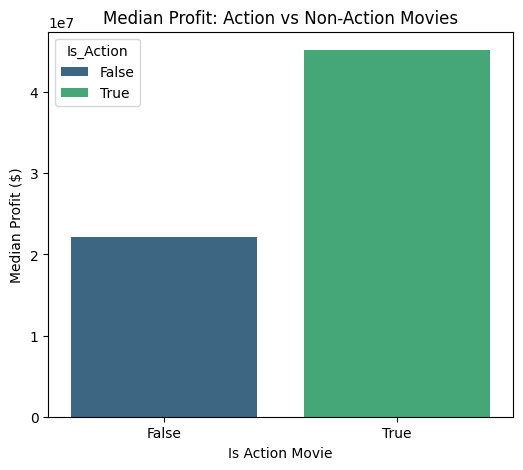

In [36]:
df_grouped_median = df_revenue.groupby('Is_Action', as_index=False, observed=False)['Profit'].median()

plt.figure(figsize=(6,5))
sns.barplot(data=df_grouped_median, x='Is_Action', y='Profit', palette='viridis', hue='Is_Action')
plt.title('Median Profit: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Median Profit ($)')
plt.show()

- On average, action movies generate much more profit than non-action movies. Although the action movies have a smaller sample size which may have had some impact on the results.
- Both mean and median confirm this to be the case leaving out any doubt that outliers had an effect on the results.

Let's now try to gauge the percentage of Action and Non-Action movies have a profit (ROI):

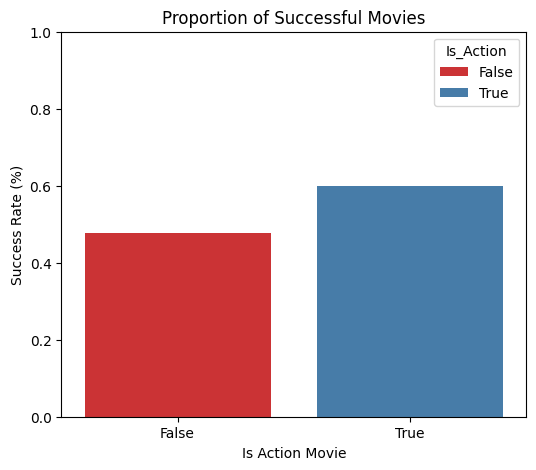

In [35]:
df['Success'] = df['Profit'] > 0

success_rate = df.groupby('Is_Action', observed=False)['Success'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=success_rate, x='Is_Action', y='Success', palette='Set1', hue='Is_Action')
plt.title('Proportion of Successful Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Success Rate (%)')
plt.ylim(0,1)
plt.show()

- Action movies generally have a higher success rate but we should also take into considiration that the sample size is much lower. 
- The combination of similar success rates but higher profit margins for action movies suggests they follow a "high risk, high reward" pattern. 
- The difference in percentage is not as great as the average profit gained from an action movie compared to a non-action movie which suggests that when action movies do succeed they tend to generate a higher amount of revenue.


Let's now see the revenue distribution density by Action vs Non-Action movies: 

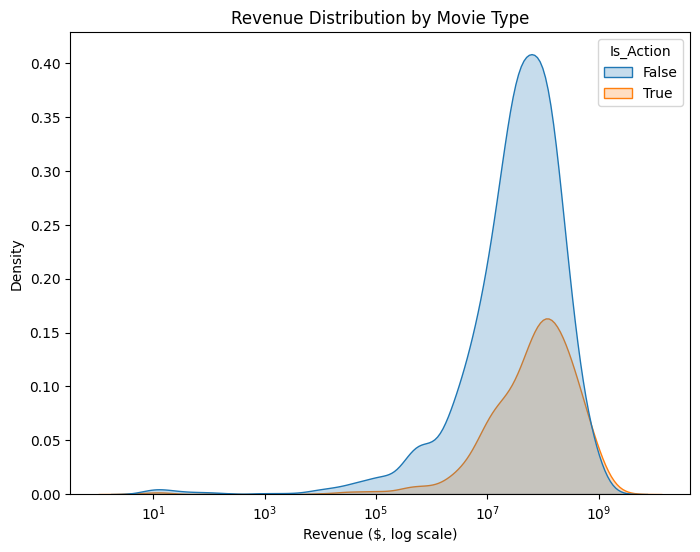

In [33]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_revenue, x='Revenue', hue='Is_Action', log_scale=True, fill=True)
plt.title('Revenue Distribution by Movie Type')
plt.xlabel('Revenue ($, log scale)')
plt.show()

- Action movies show a broader, more spread-out distribution, while Non-Action movies have a tighter, more concentrated distribution. This indicates greater variability in Action movie revenues.
- Both distributions peak at relatively similar revenue levels, confirming that the most common revenue outcome is similar for both types. However, the Action movies' peak appears slightly higher on the revenue scale, suggesting their typical outcome is somewhat better. 
- While there's substantial overlap between the two distributions, the Action curve consistently sits slightly to the right of the Non-Action curve across most of the range

## Statistical Testing - Hypothesis 4 

We will compare Action vs Non-Action movies using Mann-Whitney U tests on Revenue and Profit. This non-parametric test is robust to skewed distributions and outliers.

In [ ]:
# Prepare data for tests 
action_mask = df_revenue['Is_Action'] == True
non_action_mask = df_revenue['Is_Action'] == False

rev_action = df_revenue.loc[action_mask, 'Revenue'].dropna()
rev_non_action = df_revenue.loc[non_action_mask, 'Revenue'].dropna()

prof_action = df_revenue.loc[action_mask, 'Profit'].dropna()
prof_non_action = df_revenue.loc[non_action_mask, 'Profit'].dropna()

print("Sample sizes:")
print(f"Revenue — Action: n={len(rev_action)}, Non-Action: n={len(rev_non_action)}")
print(f"Profit  — Action: n={len(prof_action)}, Non-Action: n={len(prof_non_action)}")

Sample sizes:
Revenue — Action: n=940, Non-Action: n=2436
Profit  — Action: n=918, Non-Action: n=2311


In [40]:
# Mann-Whitney U test — Revenue (two-sided)
alpha = 0.05
mw_rev = pg.mwu(x=rev_action, y=rev_non_action, alternative='two-sided')

print("Mann-Whitney U Test — Revenue:")
print(mw_rev)
print("\n--- Interpretation ---")
p_rev = mw_rev['p-val'].values[0]
rbc_rev = mw_rev['RBC'].values[0]
print(f"p-value: {p_rev:.6f} | Effect size (RBC): {rbc_rev:.4f}")
if p_rev < alpha:
    direction = "Action > Non-Action" if rbc_rev > 0 else "Action < Non-Action"
    print(f"SIGNIFICANT difference in revenue distributions ({direction}).")
else:
    print("No significant difference in revenue distributions.")

Mann-Whitney U Test — Revenue:
         U-val alternative         p-val       RBC      CLES
MWU  1413535.0   two-sided  3.626499e-26  0.234615  0.617307

--- Interpretation ---
p-value: 0.000000 | Effect size (RBC): 0.2346
SIGNIFICANT difference in revenue distributions (Action > Non-Action).


In [41]:
# Mann-Whitney U test — Profit (two-sided)
alpha = 0.05
mw_prof = pg.mwu(x=prof_action, y=prof_non_action, alternative='two-sided')

print("Mann-Whitney U Test — Profit:")
print(mw_prof)
print("\n--- Interpretation ---")
p_prof = mw_prof['p-val'].values[0]
rbc_prof = mw_prof['RBC'].values[0]
print(f"p-value: {p_prof:.6f} | Effect size (RBC): {rbc_prof:.4f}")
if p_prof < alpha:
    direction = "Action > Non-Action" if rbc_prof > 0 else "Action < Non-Action"
    print(f"SIGNIFICANT difference in profit distributions ({direction}).")
else:
    print("No significant difference in profit distributions.")

Mann-Whitney U Test — Profit:
         U-val alternative     p-val       RBC      CLES
MWU  1176670.5   two-sided  0.000001  0.109283  0.554641

--- Interpretation ---
p-value: 0.000001 | Effect size (RBC): 0.1093
SIGNIFICANT difference in profit distributions (Action > Non-Action).


In [ ]:
# Descriptive summary to accompany tests
summary = (
    df_revenue.assign(Is_Action=df_revenue['Is_Action'].map({True: 'Action', False: 'Non-Action'}))
    .groupby('Is_Action')
    [['Revenue', 'Profit']]
    .agg(['count', 'median', 'mean'])
)
print("\nDescriptive Summary (Revenue & Profit):\n")
print(summary)


Descriptive Summary (Revenue & Profit):

           Revenue                           Profit                          
             count      median          mean  count      median          mean
Is_Action                                                                    
Non-Action    2436  41708447.0  9.529472e+07   2311  22208180.0  6.714788e+07
Action         940  85490607.5  1.733616e+08    918  45189732.0  1.144244e+08


C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\2848614712.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Is_Action')


### Directional and Robustness Checks

- One-sided Mann-Whitney tests to test the directional hypothesis (Action > Non-Action).
- Sensitivity: Repeat on log-transformed revenue (log1p) to reduce skew.

In [43]:
# One-sided Mann-Whitney: Action > Non-Action (Revenue)
alpha = 0.05
mw_rev_one_sided = pg.mwu(x=rev_action, y=rev_non_action, alternative='greater')
print("One-sided Mann-Whitney (Revenue): Action > Non-Action")
print(mw_rev_one_sided)
print(f"p-value: {mw_rev_one_sided['p-val'].values[0]:.6f}")

# One-sided Mann-Whitney: Action > Non-Action (Profit)
mw_prof_one_sided = pg.mwu(x=prof_action, y=prof_non_action, alternative='greater')
print("\nOne-sided Mann-Whitney (Profit): Action > Non-Action")
print(mw_prof_one_sided)
print(f"p-value: {mw_prof_one_sided['p-val'].values[0]:.6f}")

One-sided Mann-Whitney (Revenue): Action > Non-Action
         U-val alternative         p-val       RBC      CLES
MWU  1413535.0     greater  1.813250e-26  0.234615  0.617307
p-value: 0.000000

One-sided Mann-Whitney (Profit): Action > Non-Action
         U-val alternative         p-val       RBC      CLES
MWU  1176670.5     greater  6.142409e-07  0.109283  0.554641
p-value: 0.000001


In [44]:
# Sensitivity: log1p transform (Revenue) then Mann-Whitney two-sided
log_rev_action = np.log1p(rev_action)
log_rev_non_action = np.log1p(rev_non_action)

mw_log_rev = pg.mwu(x=log_rev_action, y=log_rev_non_action, alternative='two-sided')
print("\nMann-Whitney on log1p(Revenue):")
print(mw_log_rev)
print(f"p-value: {mw_log_rev['p-val'].values[0]:.6f} | RBC: {mw_log_rev['RBC'].values[0]:.4f}")


Mann-Whitney on log1p(Revenue):
         U-val alternative         p-val       RBC      CLES
MWU  1413535.0   two-sided  3.626499e-26  0.234615  0.617307
p-value: 0.000000 | RBC: 0.2346


## Results Summary - Hypothesis 4 (Action vs Non-Action Movies)

The following summary summarises the Mann-Whitney U test results (revenue and profit), including effect sizes and directional one-sided checks, and provides plain-English insights.

In [ ]:
alpha = 0.05

summary_lines = []

# Two-sided Revenue
mw_rev = pg.mwu(x=rev_action, y=rev_non_action, alternative='two-sided')
p_rev = mw_rev['p-val'].values[0]
rbc_rev = mw_rev['RBC'].values[0]
dir_rev = 'Action > Non-Action' if rbc_rev > 0 else ('Action < Non-Action' if rbc_rev < 0 else 'No direction')
sig_rev = 'SIGNIFICANT' if p_rev < alpha else 'Not significant'
summary_lines.append(f"Revenue (two-sided): p={p_rev:.6f}, RBC={rbc_rev:.4f} → {sig_rev} ({dir_rev})")

# Two-sided Profit
mw_prof = pg.mwu(x=prof_action, y=prof_non_action, alternative='two-sided')
p_prof = mw_prof['p-val'].values[0]
rbc_prof = mw_prof['RBC'].values[0]
dir_prof = 'Action > Non-Action' if rbc_prof > 0 else ('Action < Non-Action' if rbc_prof < 0 else 'No direction')
sig_prof = 'SIGNIFICANT' if p_prof < alpha else 'Not significant'
summary_lines.append(f"Profit (two-sided):  p={p_prof:.6f}, RBC={rbc_prof:.4f} → {sig_prof} ({dir_prof})")

# One-sided (directional) checks: Action > Non-Action
mw_rev_greater = pg.mwu(x=rev_action, y=rev_non_action, alternative='greater')
mw_prof_greater = pg.mwu(x=prof_action, y=prof_non_action, alternative='greater')
summary_lines.append(f"Revenue (one-sided Action>Non-Action): p={mw_rev_greater['p-val'].values[0]:.6f}")
summary_lines.append(f"Profit  (one-sided Action>Non-Action): p={mw_prof_greater['p-val'].values[0]:.6f}")

# Sensitivity — log1p (Revenue)
log_rev_action = np.log1p(rev_action)
log_rev_non_action = np.log1p(rev_non_action)
mw_log_rev = pg.mwu(x=log_rev_action, y=log_rev_non_action, alternative='two-sided')
summary_lines.append(f"log1p(Revenue) (two-sided): p={mw_log_rev['p-val'].values[0]:.6f}, RBC={mw_log_rev['RBC'].values[0]:.4f}")

print("\n=== Mann-Whitney U Results Summary (Hypothesis 4) ===\n")
for line in summary_lines:
    print(line)

print("\n--- Insights ---")
# Interpretations
if p_prof < alpha and rbc_prof > 0:
    print("Action movies typically achieve higher profits than non-action movies (statistically significant).")
elif p_prof < alpha and rbc_prof < 0:
    print("Non-action movies typically achieve higher profits than action movies (statistically significant).")
else:
    print("No statistically significant difference in typical profits between action and non-action movies.")

if p_rev < alpha and rbc_rev > 0:
    print("Action movies tend to generate higher revenues than non-action movies (statistically significant).")
elif p_rev < alpha and rbc_rev < 0:
    print("Non-action movies tend to generate higher revenues than action movies (statistically significant).")
else:
    print("No statistically significant difference in revenue distributions between action and non-action movies.")

# Directional checks 
if mw_rev_greater['p-val'].values[0] < alpha:
    print("Directional check supports: Action revenues are greater than non-action (one-sided test).")
if mw_prof_greater['p-val'].values[0] < alpha:
    print("Directional check supports: Action profits are greater than non-action (one-sided test).")



=== Mann-Whitney U Results Summary (Hypothesis 4) ===

Revenue (two-sided): p=0.000000, RBC=0.2346 → SIGNIFICANT (Action > Non-Action)
Profit (two-sided):  p=0.000001, RBC=0.1093 → SIGNIFICANT (Action > Non-Action)
Revenue (one-sided Action>Non-Action): p=0.000000
Profit  (one-sided Action>Non-Action): p=0.000001
log1p(Revenue) (two-sided): p=0.000000, RBC=0.2346

--- Insights ---
Action movies typically achieve higher profits than non-action movies (statistically significant).
Action movies tend to generate higher revenues than non-action movies (statistically significant).
Directional check supports: Action revenues are greater than non-action (one-sided test).
Directional check supports: Action profits are greater than non-action (one-sided test).


---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.